# Penerapan Metode AHP dan SAW dalam Pemilihan Hero Mobile Legend pada MPL Season 13

Dataset source: https://www.kaggle.com/datasets/bcakra/tournamnet-result-match-of-mpl-indonesia-season-13?select=MPL+Indonesia+Season+13+-+Hero_Role.csv

## Data Wrangling

### Loading Data

In [2]:
# Import libraries
import pandas as pd
import numpy as np

In [3]:
# Load the data
data = pd.read_csv('data/MPL Indonesia Season 13 - Hero_Role.csv')
data.head()

,Hero,Title,Hero Order,Role(s),Specialty(ies),Lane Recommendation(s),Health,Health Regen,Mana,Mana Regen,...,Pasive Deskripsi,Skill 1 Name Abilities,Skill 1 Ability,Skill 1 Pasive Deskripsi,Skill 2 Name Abilities,Skill 2 Ability,Skill 2 Pasive Deskripsi,Skill 3 Name Abilities,Skill 3 Ability,Skill 3 Pasive Deskripsi
0,Miya,"Miya, the Moonlight Archer",1,Marksman,Finisher,Gold Lane,2524,6.0,445.0,15.0,...,Miya gains 5% extra Attack Speed for 4s each t...,Moon Arrow,BUFF AoE,Miya shoots two extra arrows on each Basic Att...,Arrow of Eclipse,CC AoE,Miya launches an empowered arrow on the target...,Hidden Moonlight,Conceal Remove CC,Miya removes all debuffs on her and conceals h...
1,Balmond,"Balmond, the Bloody Beast",2,Fighter,Damage,Jungling/EXP Lane,2736,9.4,0.0,0.0,...,Balmond recovers 5% Max HP on minion or creep ...,Soul Lock,Blink Slow,Balmond charges in the target direction for a ...,Cyclone Sweep,AoE BUFF,"Balmond spins with his axe for 3s, continuousl...",Lethal Counter,Burst Slow,"After a short delay, Balmond smashes his axe i..."
2,Saber,"Saber, the Wandering Sword",3,Assassin,Charge,Jungling,2599,7.0,443.0,16.0,...,Saber's attacks reduce enemies' Physical Defen...,Orbiting Swords,AoE BUFF,Saber releases 5 swords that orbit around him ...,Charge,Blink AoE,"Saber dashes in the target direction, dealing ...",Triple Sweep,Burst CC,"Saber charges at the target enemy hero, knocki..."
3,Alice,"Alice, the Queen of Blood",4,Mage/Tank,Charge/Regen,EXP Lane/Mid Lane,2573,7.2,493.0,18.0,...,A blood orb will be generated each time an ene...,Flowing Blood,Blink AoE,Alice casts a sphere of blood energy in the ta...,Blood Awe,CC AoE,Alice deals 270(+90%Total Magic Power) Magic D...,Blood Ode,AoE HEAL,"Alice enters the blood-draining state, consumi..."
4,Nana,"Nana, the Sweet Leonin",5,Mage,Poke,Mid Lane/Roaming,2501,6.8,510.0,18.0,...,"Upon taking fatal damage, Nana removes all deb...",Magic Boomerang,AoE,Nana hurls her Magic Boomerang in the target d...,Molina Smooch,CC Debuff,"Nana sends Molina to the target location, who ...",Molina Blitz,Burst CC,Nana summons Molina to attack the target area ...


### Assessing Data

In [4]:
# Check the shape of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Hero                      123 non-null    object 
 1   Title                     123 non-null    object 
 2   Hero Order                123 non-null    int64  
 3   Role(s)                   123 non-null    object 
 4   Specialty(ies)            123 non-null    object 
 5   Lane Recommendation(s)    123 non-null    object 
 6   Health                    123 non-null    int64  
 7   Health Regen              123 non-null    float64
 8   Mana                      118 non-null    float64
 9   Mana Regen                118 non-null    float64
 10  Attack Speed              123 non-null    object 
 11  Physical Damage           123 non-null    int64  
 12  Magical Damage            123 non-null    int64  
 13  Physical Defense          123 non-null    int64  
 14  Magical De

Total 34 kolom dan 123 entri hero. Terdapat beberapa tipe data pada kolom krusial yang belum sesuai, seperti win rate, price, dan attack speed.

In [5]:
data.nunique()

Hero                        123
Title                       123
Hero Order                  123
Role(s)                      24
Specialty(ies)               40
Lane Recommendation(s)       18
Health                       83
Health Regen                 26
Mana                         43
Mana Regen                   19
Attack Speed                 35
Physical Damage              31
Magical Damage                1
Physical Defense             16
Magical Defense               2
Movement Speed               13
Energy                        1
Energy Regen                  5
Price                        13
Specialty                    61
Win Rate                    123
Hero.1                      123
 Name Pasive Abilities      123
Ability                      30
Pasive Deskripsi            123
Skill 1 Name Abilities      123
Skill 1 Ability              41
Skill 1 Pasive Deskripsi    123
Skill 2 Name Abilities      123
Skill 2 Ability              59
Skill 2 Pasive Deskripsi    123
Skill 3 

In [6]:
# Mengecek nilai null
data.isna().sum()

Hero                          0
Title                         0
Hero Order                    0
Role(s)                       0
Specialty(ies)                0
Lane Recommendation(s)        0
Health                        0
Health Regen                  0
Mana                          5
Mana Regen                    5
Attack Speed                  0
Physical Damage               0
Magical Damage                0
Physical Defense              0
Magical Defense               0
Movement Speed                0
Energy                      117
Energy Regen                117
Price                         1
Specialty                     3
Win Rate                      0
Hero.1                        0
 Name Pasive Abilities        0
Ability                       0
Pasive Deskripsi              0
Skill 1 Name Abilities        0
Skill 1 Ability               0
Skill 1 Pasive Deskripsi      0
Skill 2 Name Abilities        0
Skill 2 Ability               0
Skill 2 Pasive Deskripsi      0
Skill 3 

Terdapat 5 entri hero yang tidak menggunakan mana/mana regen melainkan energi/regen. 1 entri hero juga yang pricenya null. Untuk kolom specialty, dikarenakan tidak relevant dengan tujuan yg dicapai maka abaikan saja

In [7]:
data.describe()

,Hero Order,Health,Health Regen,Mana,Mana Regen,Physical Damage,Magical Damage,Physical Defense,Magical Defense,Movement Speed,Energy,Energy Regen
count,123.000000,123.000000,123.000000,118.000000,118.000000,123.000000,123.0,123.000000,123.000000,123.000000,6.0,6.000000
mean,62.000000,2580.544715,7.681301,347.211864,12.708475,116.065041,0.0,19.154472,14.878049,251.495935,100.0,42.800000
std,35.651087,207.092529,1.592161,214.532322,8.567745,9.835316,0.0,3.550646,0.774442,8.715328,0.0,96.618425
min,1.000000,918.000000,3.800000,0.000000,0.000000,90.000000,0.0,10.000000,10.000000,240.000000,100.0,0.800000
25%,31.500000,2501.000000,6.800000,0.000000,0.000000,110.000000,0.0,17.000000,15.000000,240.000000,100.0,3.250000
50%,62.000000,2578.000000,7.200000,440.000000,15.000000,117.000000,0.0,19.000000,15.000000,252.000000,100.0,4.000000
75%,92.500000,2701.000000,8.000000,490.000000,18.000000,122.000000,0.0,21.500000,15.000000,260.000000,100.0,4.750000
max,123.000000,2909.000000,18.400000,750.000000,31.000000,140.000000,0.0,27.000000,15.000000,270.000000,100.0,240.000000


- Dikarenakan kolom magical damage bernilai 0 semua dan hero magic pun mempunyai physical damage pada tabel, anggap physical damage sebagai damage universal.
- Dikarenakan beberapa hero ada yang tidak menggunakan mana sama sekali dan beberapa hero juga menggunakan energi. Penggunaan mana,energi,mana regen, dan energi regen diabaikan saja dari kriteria.

In [8]:
print("Jumlah duplikasi: ", data.duplicated().sum())

Jumlah duplikasi:  0


### Data Cleaning

In [9]:
clean_data = data.copy()

#### Menyesuaikan tipe data

Mengubah tipe data win rate, price, dan attack speed menjadi float

In [10]:
# Mengecek tipe data win rate, price, dan attack speed
clean_data[['Win Rate', 'Price', 'Attack Speed']].dtypes

Win Rate        object
Price           object
Attack Speed    object
dtype: object

In [11]:
# Melihat entri data win rate, price, dan attack speed
clean_data[['Attack Speed', 'Price', 'Win Rate']].head()

,Attack Speed,Price,Win Rate
0,1.06 ┃ 100%,10800,33W : 32L (50.77%)
1,1.06 ┃ 100%,6500 299,453W : 516L (46.75%)
2,1.08 ┃ 100%,6500 299,142W : 146L (49.31%)
3,1 ┃ 100%,15000 399,513W : 526L (49.37%)
4,1.08 ┃ 100%,6500 299,74W : 105L (41.34%)


In [12]:
# Mengganti nilai data attack speed
clean_data['Attack Speed'] = clean_data['Attack Speed'].str.split('┃').str[0].astype(float)

In [13]:
# Mengganti nilai data win rate
clean_data['Win Rate'] = clean_data['Win Rate'].str.extract(r'(\d+(\.\d+)?)%\)$')[0].astype(float)

In [14]:
# Mengganti nilai data price
clean_data['Price'] = clean_data['Price'].str.split().str[0].astype(float)

In [15]:
# Melihat entri data win rate, price, dan attack speed
clean_data[['Attack Speed', 'Price', 'Win Rate']].head()

,Attack Speed,Price,Win Rate
0,1.06,10800.0,50.77
1,1.06,6500.0,46.75
2,1.08,6500.0,49.31
3,1.00,15000.0,49.37
4,1.08,6500.0,41.34


In [16]:
# Mengecek Tipe Data
clean_data[['Win Rate', 'Price', 'Attack Speed']].dtypes

Win Rate        float64
Price           float64
Attack Speed    float64
dtype: object

#### Mengisi nilai price yang hilang

In [17]:
# Melihat hero yang mempunyai price yang hilang.
clean_data[clean_data['Price'].isna()]

,Hero,Title,Hero Order,Role(s),Specialty(ies),Lane Recommendation(s),Health,Health Regen,Mana,Mana Regen,...,Pasive Deskripsi,Skill 1 Name Abilities,Skill 1 Ability,Skill 1 Pasive Deskripsi,Skill 2 Name Abilities,Skill 2 Ability,Skill 2 Pasive Deskripsi,Skill 3 Name Abilities,Skill 3 Ability,Skill 3 Pasive Deskripsi
118,Novaria,"Novaria, the Star Rebel",119,Mage,Burst,Mid Lane,2401,6.8,540.0,4.6,...,Astral Spheres summoned by Novaria will contin...,Astral Meteor,Slow AoE,Novaria summons an Astral Sphere at the target...,Astral Recall,Burst BUFF,Novaria summons an Astral Sphere at a distance...,Astral Echo,BUFF,Novaria scatters Astral Echo in the target dir...


Hero yang mempunyai price yang hilang adalah hero yang bernama "Novaria". Isi nilai yang hilang dengan 32000 karena harga hero novaria di game adalah 32000.

In [18]:
# Mengisi nilai
clean_data['Price'].fillna(32000, inplace=True)

In [19]:
# Mengecek nilai null pada price kembali
clean_data['Price'].isna().sum()

0

In [20]:
# Mengecek price hero novaria
clean_data[clean_data['Hero'] == 'Novaria'].Price

118    32000.0
Name: Price, dtype: float64

#### Drop Hero Freya

Hero Freya dihapus karena hero tersebut tidak bisa dibeli dengan battle points ataupun diamond, melainkan harus didapatkan melalui event.

In [21]:
# Drop hero Freya
clean_data = clean_data[clean_data['Hero'] != 'Freya']

#### Menyeleksi Fitur yang Dibutuhkan

In [22]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122 entries, 0 to 122
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Hero                      122 non-null    object 
 1   Title                     122 non-null    object 
 2   Hero Order                122 non-null    int64  
 3   Role(s)                   122 non-null    object 
 4   Specialty(ies)            122 non-null    object 
 5   Lane Recommendation(s)    122 non-null    object 
 6   Health                    122 non-null    int64  
 7   Health Regen              122 non-null    float64
 8   Mana                      117 non-null    float64
 9   Mana Regen                117 non-null    float64
 10  Attack Speed              122 non-null    float64
 11  Physical Damage           122 non-null    int64  
 12  Magical Damage            122 non-null    int64  
 13  Physical Defense          122 non-null    int64  
 14  Magical De

In [23]:
features_needed = ['Hero', 'Health', 'Health Regen', 'Attack Speed', 'Physical Damage', 'Physical Defense', 'Magical Defense', 'Movement Speed', 'Price', 'Win Rate']

In [24]:
final_data = clean_data[features_needed].copy()

In [25]:
# Rename physical damage column to damage
final_data.rename(columns={'Physical Damage': 'Damage'}, inplace=True)

In [26]:
final_data.head()

,Hero,Health,Health Regen,Attack Speed,Damage,Physical Defense,Magical Defense,Movement Speed,Price,Win Rate
0,Miya,2524,6.0,1.06,100,17,15,240,10800.0,50.77
1,Balmond,2736,9.4,1.06,119,25,15,260,6500.0,46.75
2,Saber,2599,7.0,1.08,118,20,15,260,6500.0,49.31
3,Alice,2573,7.2,1.00,114,21,15,240,15000.0,49.37
4,Nana,2501,6.8,1.08,115,17,15,250,6500.0,41.34


In [27]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122 entries, 0 to 122
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Hero              122 non-null    object 
 1   Health            122 non-null    int64  
 2   Health Regen      122 non-null    float64
 3   Attack Speed      122 non-null    float64
 4   Damage            122 non-null    int64  
 5   Physical Defense  122 non-null    int64  
 6   Magical Defense   122 non-null    int64  
 7   Movement Speed    122 non-null    int64  
 8   Price             122 non-null    float64
 9   Win Rate          122 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 10.5+ KB


In [28]:
final_data.describe()

,Health,Health Regen,Attack Speed,Damage,Physical Defense,Magical Defense,Movement Speed,Price,Win Rate
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,2578.737705,7.663934,1.040656,116.122951,19.131148,14.877049,251.426230,28449.180328,48.789098
std,206.970545,1.586986,0.059983,9.854795,3.555814,0.777556,8.716772,7754.350908,4.767669
min,918.000000,3.800000,0.870000,90.000000,10.000000,10.000000,240.000000,2000.000000,25.000000
25%,2501.000000,6.800000,1.000000,110.250000,17.000000,15.000000,240.000000,32000.000000,47.020000
50%,2578.000000,7.200000,1.030000,117.000000,19.000000,15.000000,252.000000,32000.000000,49.445000
75%,2700.250000,8.000000,1.080000,122.500000,21.000000,15.000000,260.000000,32000.000000,51.122500
max,2909.000000,18.400000,1.220000,140.000000,27.000000,15.000000,270.000000,32000.000000,61.110000


In [29]:
# Simpan data yang sudah final
final_data.to_csv('./data/final_data.csv', index=False)

# Implementasi Metode Sistem Pendukung Keputusan

## Metode AHP untuk Menentukan Bobot Kriteria

In [66]:
# Define matrix comparison
comparison_matrix = np.array([
    [1,   2,   4,   5,   5,   5,   4,   3,   3],
    [1/2, 1,   2,   3,   3,   4,   2,   2,   3],
    [1/4, 1/2, 1,   2,   3,   3,   2,   1,   2],
    [1/5, 1/3, 1/2, 1,   2,   3,   1,   1,   2],
    [1/5, 1/3, 1/3, 1/2, 1,   2,   2,   1,   1],
    [1/5, 1/4, 1/3, 1/3, 1/2, 1,   1,   2,   1],
    [1/4, 1/2, 1/2, 1,   1/2, 1,   1,   1,   2],
    [1/3, 1/2, 1,   1,   1,   1/2, 1,   1,   1],
    [1/3, 1/3, 1/2, 1/2, 1,   1,   1/2, 1,   1]
])

In [67]:
# Sum the normalization matrix
column_sum = comparison_matrix.sum(axis=0)
normalized_matrix = comparison_matrix / column_sum
print(normalized_matrix)

[[0.30612245 0.34782609 0.39344262 0.34883721 0.29411765 0.24390244
  0.27586207 0.23076923 0.1875    ]
 [0.15306122 0.17391304 0.19672131 0.20930233 0.17647059 0.19512195
  0.13793103 0.15384615 0.1875    ]
 [0.07653061 0.08695652 0.09836066 0.13953488 0.17647059 0.14634146
  0.13793103 0.07692308 0.125     ]
 [0.06122449 0.05797101 0.04918033 0.06976744 0.11764706 0.14634146
  0.06896552 0.07692308 0.125     ]
 [0.06122449 0.05797101 0.03278689 0.03488372 0.05882353 0.09756098
  0.13793103 0.07692308 0.0625    ]
 [0.06122449 0.04347826 0.03278689 0.02325581 0.02941176 0.04878049
  0.06896552 0.15384615 0.0625    ]
 [0.07653061 0.08695652 0.04918033 0.06976744 0.02941176 0.04878049
  0.06896552 0.07692308 0.125     ]
 [0.10204082 0.08695652 0.09836066 0.06976744 0.05882353 0.02439024
  0.06896552 0.07692308 0.0625    ]
 [0.10204082 0.05797101 0.04918033 0.03488372 0.05882353 0.04878049
  0.03448276 0.07692308 0.0625    ]]


In [68]:
# Sum each row of the normalization matrix
row_sum = normalized_matrix.sum(axis=1)

# Calculate the priority_scale
priority_scale = row_sum / 9

# Calculate Weighted Sum Vector
weighted_matrix = np.dot(comparison_matrix, priority_scale)

# Calculate Consistency Vector
consistency_vector = weighted_matrix / priority_scale

# Calculate Lambda Max and Consistency Index
lambda_max = consistency_vector.mean()
consistency_index = (lambda_max - 9) / (9 - 1)
print("Lambda max: ", lambda_max)
print("Consistency index (CI): ", consistency_index)

Lambda max:  9.56902111821568
Consistency index (CI):  0.07112763977696002


In [69]:
# Calculate Consistency Ratio
random_index = 1.45 #n=9
consistency_ratio = consistency_index / random_index
print("Consistency ratio (CR): ", consistency_ratio)

Consistency ratio (CR):  0.04905354467376553


In [70]:
# Ensure CR is less than 0.1 for acceptable consistency
if consistency_ratio < 0.1:
    print("The comparison matrix are consistent.")
else:
    print("The comparison matrix are not consistent. Consider revising the matrix.")

The comparison matrix are consistent.


Dikarenakan CR < 0.1, maka comparison_matrix yang berpasangan **konsisten**.

# Mengintegrasikan Bobot AHP dengan SAW

In [71]:
# Define the criteria
criteria = ['Health', 'Health Regen', 'Attack Speed', 'Damage', 'Physical Defense', 'Magical Defense', 'Movement Speed', 'Price', 'Win Rate']

heroes = ['Miya', 'Balmond', 'Saber', 'Alice', 'Nana', 'Tigreal', 'Alucard', 'Karina', 'Akai', 'Franco', 'Bane', 'Bruno', 'Clint', 'Rafaela',
    'Eudora', 'Zilong', 'Fanny', 'Layla', 'Minotaur', 'Lolita', 'Hayabusa', 'Gord', 'Natalia', 'Kagura', 'Chou', 'Sun',
    'Alpha', 'Ruby', 'Yi Sun-shin', 'Moskov', 'Johnson', 'Cyclops', 'Estes', 'Hilda', 'Aurora', 'Lapu-Lapu', 'Vexana', 'Roger',
    'Karrie', 'Gatotkaca', 'Harley', 'Irithel', 'Grock', 'Argus', 'Odette', 'Lancelot', 'Diggie', 'Hylos', 'Zhask', 'Helcurt',
    'Pharsa', 'Lesley', 'Jawhead', 'Angela', 'Gusion', 'Valir', 'Martis', 'Uranus', 'Hanabi', "Chang'e", 'Kaja', 'Selena',
    'Aldous', 'Claude', 'Vale', 'Leomord', 'Lunox', 'Hanzo', 'Belerick', 'Kimmy', 'Thamuz', 'Harith', 'Minsitthar', 'Kadita',
    'Faramis', 'Badang', 'Khufra', 'Granger', 'Guinevere', 'Esmeralda', 'Terizla', 'X.Borg', 'Ling', 'Dyrroth', 'Lylia', 'Baxia', 'Masha',
    'Wanwan', 'Silvanna', 'Cecilion', 'Carmilla', 'Atlas', 'Popol and Kupa', 'Yu Zhong', 'Luo Yi', 'Benedetta', 'Khaleed',
    'Barats', 'Brody', 'Yve', 'Mathilda', 'Paquito', 'Gloo', 'Beatrix', 'Phoveus', 'Natan', 'Aulus', 'Aamon', 'Valentina', 'Edith',
    'Floryn', 'Yin', 'Melissa', 'Xavier', 'Julian', 'Fredrinn', 'Joy','Novaria', 'Arlott', 'Ixia', 'Nolan', 'Cici']

In [72]:
# Define the weights
weights = np.array(weighted_matrix)
weights

array([2.85452071, 1.71569693, 1.16184572, 0.83378325, 0.65569705,
       0.5359009 , 0.65778226, 0.68818759, 0.55083807])

In [73]:
# Define cost-benefit
cost_benefit = ['benefit', 'benefit', 'benefit', 'benefit', 'benefit', 'benefit', 'benefit', 'cost', 'benefit']

In [74]:
# Load data
df = pd.read_csv("data/final_data.csv")
df.head()

,Hero,Health,Health Regen,Attack Speed,Damage,Physical Defense,Magical Defense,Movement Speed,Price,Win Rate
0,Miya,2524,6.0,1.06,100,17,15,240,10800.0,50.77
1,Balmond,2736,9.4,1.06,119,25,15,260,6500.0,46.75
2,Saber,2599,7.0,1.08,118,20,15,260,6500.0,49.31
3,Alice,2573,7.2,1.00,114,21,15,240,15000.0,49.37
4,Nana,2501,6.8,1.08,115,17,15,250,6500.0,41.34


In [75]:
# drop hero column
df.drop(columns=['Hero'], inplace=True)

In [76]:
# Normalize the data
normalized_df = df.copy()
for col in normalized_df.columns:
    if col in ['Price']:
        normalized_df[col] = normalized_df[col].max() / normalized_df[col]
    else:
        normalized_df[col] = normalized_df[col] / normalized_df[col].max()
        

In [77]:
normalized_df.head()

,Health,Health Regen,Attack Speed,Damage,Physical Defense,Magical Defense,Movement Speed,Price,Win Rate
0,0.867652,0.326087,0.868852,0.714286,0.629630,1.0,0.888889,2.962963,0.830797
1,0.940529,0.510870,0.868852,0.850000,0.925926,1.0,0.962963,4.923077,0.765014
2,0.893434,0.380435,0.885246,0.842857,0.740741,1.0,0.962963,4.923077,0.806906
3,0.884496,0.391304,0.819672,0.814286,0.777778,1.0,0.888889,2.133333,0.807887
4,0.859746,0.369565,0.885246,0.821429,0.629630,1.0,0.925926,4.923077,0.676485


In [78]:
# Calculate the weighted normalized decision matrix
weighted_normalized_df = normalized_df.copy()
weighted_normalized_df = weighted_normalized_df * weights

In [79]:
weighted_normalized_df.head()

,Health,Health Regen,Attack Speed,Damage,Physical Defense,Magical Defense,Movement Speed,Price,Win Rate
0,2.476731,0.559466,1.009473,0.595559,0.412846,0.535901,0.584695,2.039074,0.457635
1,2.684761,0.876497,1.009473,0.708716,0.607127,0.535901,0.633420,3.388000,0.421399
2,2.550326,0.652711,1.028519,0.702760,0.485702,0.535901,0.633420,3.388000,0.444474
3,2.524813,0.671360,0.952333,0.678938,0.509987,0.535901,0.584695,1.468134,0.445015
4,2.454162,0.634062,1.028519,0.684893,0.412846,0.535901,0.609058,3.388000,0.372634


In [80]:
# Calculate the SAW score
saw_score = weighted_normalized_df.copy()
for idx, row in saw_score.iterrows():
    saw_score.loc[idx, 'SAW Score'] = np.sum(row)
    
saw_score['Hero'] = heroes

In [81]:
saw_score.head()

,Health,Health Regen,Attack Speed,Damage,Physical Defense,Magical Defense,Movement Speed,Price,Win Rate,SAW Score,Hero
0,2.476731,0.559466,1.009473,0.595559,0.412846,0.535901,0.584695,2.039074,0.457635,8.671381,Miya
1,2.684761,0.876497,1.009473,0.708716,0.607127,0.535901,0.633420,3.388000,0.421399,10.865293,Balmond
2,2.550326,0.652711,1.028519,0.702760,0.485702,0.535901,0.633420,3.388000,0.444474,10.421814,Saber
3,2.524813,0.671360,0.952333,0.678938,0.509987,0.535901,0.584695,1.468134,0.445015,8.371175,Alice
4,2.454162,0.634062,1.028519,0.684893,0.412846,0.535901,0.609058,3.388000,0.372634,10.120075,Nana


In [82]:
# Rank the hero based on the SAW score
saw_score = saw_score.sort_values(by='SAW Score', ascending=False)
saw_score.reset_index(drop=True, inplace=True)
saw_score.index += 1
saw_score[['Hero', 'SAW Score']].head(20)

,Hero,SAW Score
1,Eudora,17.920501
2,Layla,17.657190
3,Balmond,10.865293
4,Bane,10.560597
5,Tigreal,10.510167
6,Saber,10.421814
7,Nana,10.120075
8,Rafaela,10.032993
9,Hylos,8.856854
10,Miya,8.671381


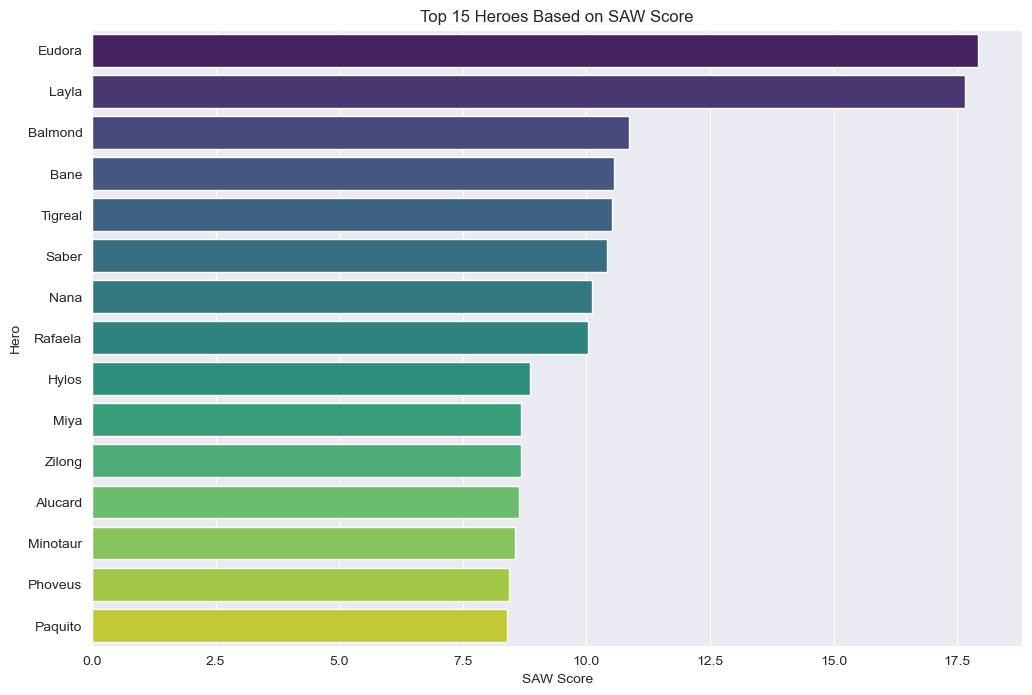

In [83]:
# Visualize the top 15 heroes
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 8))
sns.barplot(x='SAW Score', y='Hero', data=saw_score.head(15), palette='viridis')
plt.title('Top 15 Heroes Based on SAW Score')
plt.xlabel('SAW Score')
plt.ylabel('Hero')
plt.show()